**Importing the Libraries**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Reading the COVID dataset**

In [ ]:
df=pd.read_csv('Covid.csv')

**Taking a look at our dataset**

In [ ]:
df.head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running 0se,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,0,0,1
7,1,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
8,1,1,1,0,1,0,1,0,0,1,...,1,0,1,1,1,0,0,0,0,1
9,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


**Data Exploration**

In [ ]:
df.shape

(5434, 21)

In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running 0se',
       'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease',
       'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ',
       'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

**Checking for Null Values**

In [ ]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running 0se                                0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [ ]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running 0se,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


**Dropping of Irrelevant Features**

In [ ]:
df=df.drop(['Wearing Masks','Sanitization from Market'], axis = 1)

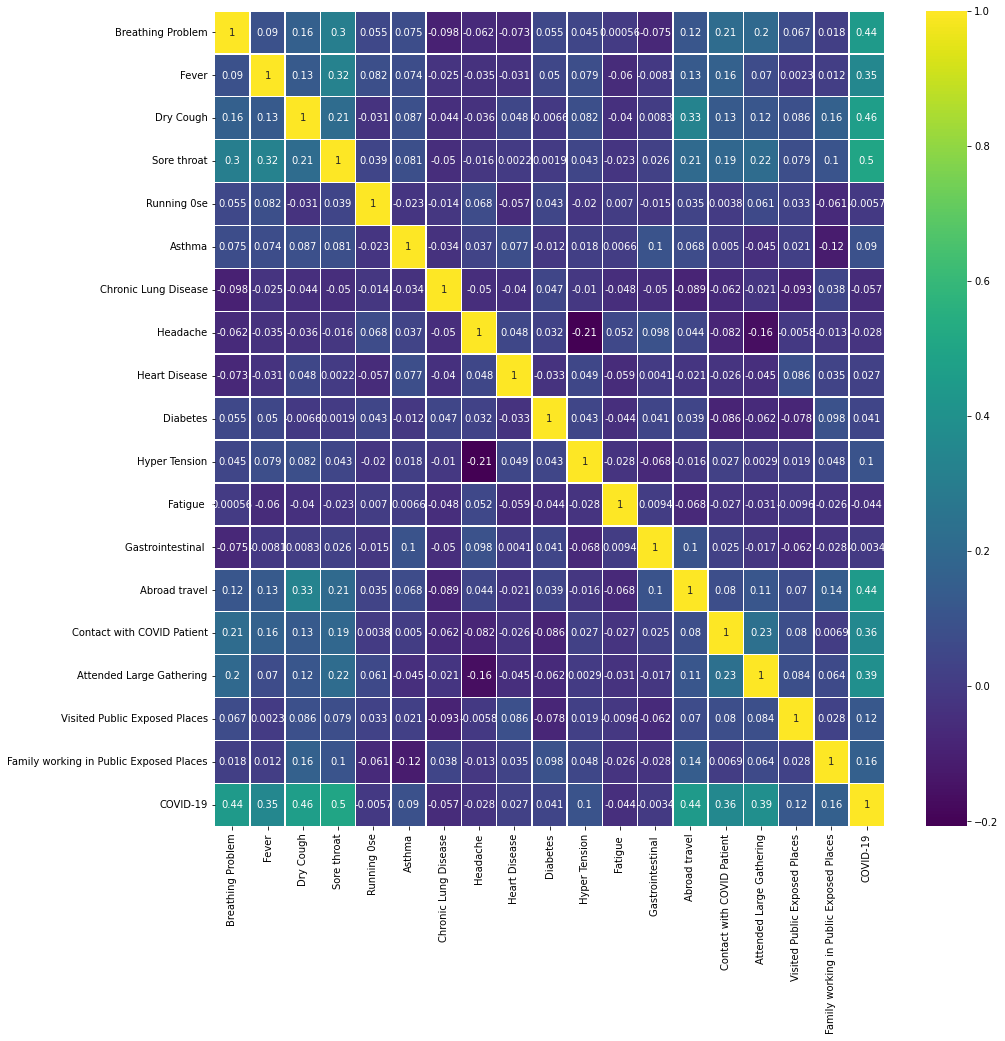

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

**Splitting our dataset into training and testing datasets**

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=22)

**Model Comparison Based on accuracy & F1-Score**

Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9650413983440662

In [ ]:
print("F1-Score=",f1_score(y_test,y_pred))

F1-Score= 0.9781859931113662


Naïve Bayes

In [ ]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.score(X_test,y_test))

0.7562097516099356


In [ ]:
print("F1-Score=",f1_score(y_test,y_pred))

F1-Score= 0.8196051735874745


Stochastic Gradient Descent

In [ ]:
model=SGDClassifier(random_state=22)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.score(X_test,y_test))

0.9595216191352346


In [ ]:
print("F1-Score=",f1_score(y_test,y_pred))

F1-Score= 0.974537037037037


Decision Tree

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=22)
dt.fit(X_train,y_train)
dt_y_pred=dt.predict(X_test)
print(dt.score(X_test,y_test))

0.9770009199632015


In [ ]:
print("F1-Score=",f1_score(y_test,dt_y_pred))

F1-Score= 0.9855407750144591


Support Vector Machine

In [ ]:
svm=SVC(kernel='linear',C=0.025,random_state=22)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
svm.score(X_test,y_test)

0.952161913523459

In [ ]:
print("F1-Score=",f1_score(y_test,y_pred))

F1-Score= 0.9703534777651084


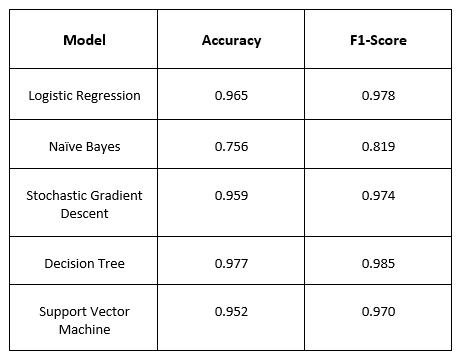

It is clear from the above table that a Decision Tree model would be best suited for our dataset.

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_y_pred=rf.predict(X_test)

In [ ]:
print(rf.score(X_test,y_test))
print(f1_score(y_test,rf_y_pred))

0.9770009199632015
0.9855407750144591


same results as decision Tree